In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('ResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
df.shape

(962, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [5]:
df.columns

Index(['Category', 'Resume'], dtype='object')

In [6]:
df['Category']

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

In [7]:
df['Category'].nunique()

25

In [8]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [9]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

## EDA (EXPLORATARY DATA ANALYSIS)

In [11]:
df['Category'].describe()

count                962
unique                25
top       Java Developer
freq                  84
Name: Category, dtype: object

<Axes: xlabel='count', ylabel='Category'>

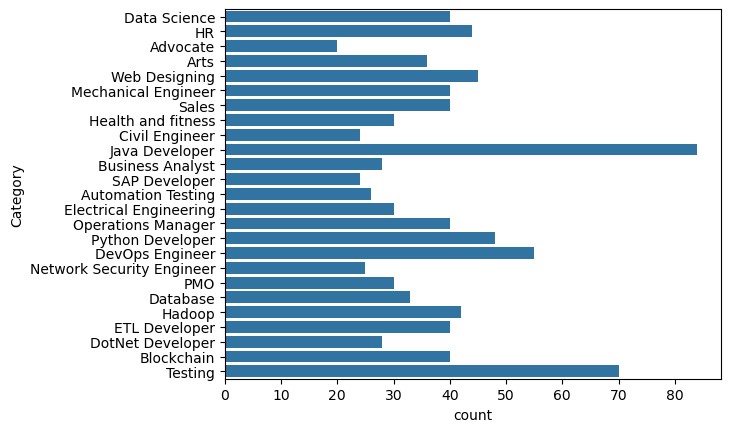

In [12]:
sns.countplot(df['Category'])

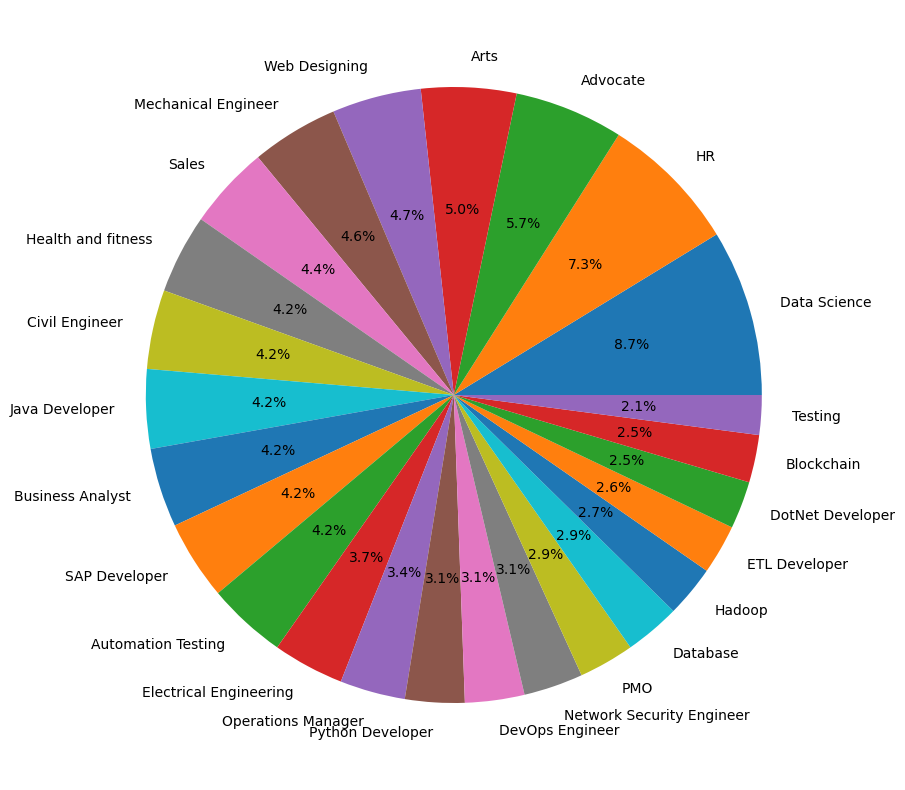

In [13]:
plt.figure(figsize=(15,10))
counts=df['Category'].value_counts()
category=df['Category'].unique()
plt.pie(counts,labels=category,autopct='%0.1f%%')
plt.show()

In [14]:
df['Resume']

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object

In [15]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [16]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

## DATA PREPROCESSING
### 1.tokeniztion----breaking data into parts 
#### a.word tokenization
#### b.sentence tokenization

### 2.text cleaning
#### a.remove special characters
#### b.remove stop words--- WHICH HAS ZERO IMPOTANCE
#### c.stemming or lematization--- cut to base word

### 3. vectorization--- converting text data to numeric vector
#### a.Tfidf
#### b.bag of words

### 4. train test split

In [18]:
import nltk
import re


#In NLTK (Natural Language Toolkit), "re" typically refers to regular expressions, which are handled by Python's built-in re module. NLTK uses re for various text-processing tasks

In [19]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bandarusamanthuday/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [20]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bandarusamanthuday/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/bandarusamanthuday/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [21]:
from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()



In [22]:
import re

def cleanresume(txt):
    if isinstance(txt, list):     #1. isinstance(txt, list) Checks if the variable txt is a list type (e.g. ["Java", "Developer", 2024]).
        txt = ' '.join(map(str, txt)) #2. map(str, txt)Converts each item in the list to a string (this handles cases where items are integers, floats, etc.).
                                      #
    cleantext = re.sub(r'http\S+', '', txt)  
    cleantext = re.sub(r'RT|cc', '', cleantext) 
    cleantext = re.sub(r'#\S+', '', cleantext)  
    cleantext = re.sub(r'@\S+', '', cleantext)  
    cleantext = re.sub(r'[%s]' % re.escape("""!'#@$%^&*()"_-+={[]}\|:;<,.>/?`~"""), '', cleantext) 
    cleantext = re.sub(r'[^a-zA-Z0-9]', '', cleantext)  # Remove non-ASCII characters
    cleantext = re.sub(r'\s+', ' ', cleantext)  # Replace multiple whitespace with a single space
    cleantext = cleantext.strip()  # Remove leading/trailing whitespace


    words=cleantext.lower()
    words=cleantext.split()

    lemmatized=[lem.lemmatize(word) for word in words] 
      
    
    return ' '.join(lemmatized)


<>:11: SyntaxWarning: invalid escape sequence '\|'
<>:11: SyntaxWarning: invalid escape sequence '\|'
/var/folders/kp/0lc6m80s5zg23d9kw2dypdr80000gn/T/ipykernel_5804/940807414.py:11: SyntaxWarning: invalid escape sequence '\|'
  cleantext = re.sub(r'[%s]' % re.escape("""!'#@$%^&*()"_-+={[]}\|:;<,.>/?`~"""), '', cleantext)


In [23]:
df['Resume'] = df['Resume'].apply(cleanresume)


In [24]:
df['Resume']

0      SkillsProgrammingLanguagesPythonpandasnumpysci...
1      EducationDetailsMay2013toMay2017BEUITRGPVDataS...
2      AreasofInterestDeepLearningControlSystemDesign...
3      SkillsRPythonSAPHANATableauSAPHANASQLSAPHANAPA...
4      EducationDetailsMCAYMCAUSTFaridabadHaryanaData...
                             ...                        
957    ComputerSkillsProficientinMSofficeWordBasicExc...
958    WillingnesstoaeptthechallengesPositivethinking...
959    PERSONALSKILLSQuicklearnerEagernesstolearnnewt...
960    COMPUTERSKILLSSOFTWAREKNOWLEDGEMSPowerPointMSO...
961    SkillSetOSWindowsXP788110DatabaseMYSQLsqlserve...
Name: Resume, Length: 962, dtype: object

In [25]:
df

,Category,Resume
0,Data Science,SkillsProgrammingLanguagesPythonpandasnumpysci...
1,Data Science,EducationDetailsMay2013toMay2017BEUITRGPVDataS...
2,Data Science,AreasofInterestDeepLearningControlSystemDesign...
3,Data Science,SkillsRPythonSAPHANATableauSAPHANASQLSAPHANAPA...
4,Data Science,EducationDetailsMCAYMCAUSTFaridabadHaryanaData...
...,...,...
957,Testing,ComputerSkillsProficientinMSofficeWordBasicExc...
958,Testing,WillingnesstoaeptthechallengesPositivethinking...
959,Testing,PERSONALSKILLSQuicklearnerEagernesstolearnnewt...
960,Testing,COMPUTERSKILLSSOFTWAREKNOWLEDGEMSPowerPointMSO...


In [26]:
### encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Category']=le.fit_transform(df['Category'])
df

,Category,Resume
0,6,SkillsProgrammingLanguagesPythonpandasnumpysci...
1,6,EducationDetailsMay2013toMay2017BEUITRGPVDataS...
2,6,AreasofInterestDeepLearningControlSystemDesign...
3,6,SkillsRPythonSAPHANATableauSAPHANASQLSAPHANAPA...
4,6,EducationDetailsMCAYMCAUSTFaridabadHaryanaData...
...,...,...
957,23,ComputerSkillsProficientinMSofficeWordBasicExc...
958,23,WillingnesstoaeptthechallengesPositivethinking...
959,23,PERSONALSKILLSQuicklearnerEagernesstolearnnewt...
960,23,COMPUTERSKILLSSOFTWAREKNOWLEDGEMSPowerPointMSO...


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
required=tfidf.fit_transform(df['Resume'])

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(required,df['Category'],test_size=0.2,random_state=42)


## MODELING AND EVALUATION


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf=OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred=clf.predict(X_test)
print(accuracy_score(y_test,ypred))

0.9637305699481865


In [31]:

X_train.shape

(769, 166)

In [32]:
X_test.shape

(193, 166)

## prediction system

In [34]:
import pickle

pickle.dump(tfidf, open('tfidf.pkl', 'wb'))   
pickle.dump(clf, open('clf.pkl', 'wb'))      


In [35]:
myresume='Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigations and Dispute Services   Assurance\r\nTECHNOLOGY ASSISTED REVIEW\r\nTAR (Technology Assisted Review) assists in accelerating the review process and run analytics and generate reports.\r\n* Core member of a team helped in developing automated review platform tool from scratch for assisting E discovery domain, this tool implements predictive coding and topic modelling by automating reviews, resulting in reduced labor costs and time spent during the lawyers review.\r\n* Understand the end to end flow of the solution, doing research and development for classification models, predictive analysis and mining of the information present in text data. Worked on analyzing the outputs and precision monitoring for the entire tool.\r\n* TAR assists in predictive coding, topic modelling from the evidence by following EY standards. Developed the classifier models in order to identify "red flags" and fraud-related issues.\r\n\r\nTools & Technologies: Python, scikit-learn, tfidf, word2vec, doc2vec, cosine similarity, NaÃ¯ve Bayes, LDA, NMF for topic modelling, Vader and text blob for sentiment analysis. Matplot lib, Tableau dashboard for reporting.\r\n\r\nMULTIPLE DATA SCIENCE AND ANALYTIC PROJECTS (USA CLIENTS)\r\nTEXT ANALYTICS - MOTOR VEHICLE CUSTOMER REVIEW DATA * Received customer feedback survey data for past one year. Performed sentiment (Positive, Negative & Neutral) and time series analysis on customer comments across all 4 categories.\r\n* Created heat map of terms by survey category based on frequency of words * Extracted Positive and Negative words across all the Survey categories and plotted Word cloud.\r\n* Created customized tableau dashboards for effective reporting and visualizations.\r\nCHATBOT * Developed a user friendly chatbot for one of our Products which handle simple questions about hours of operation, reservation options and so on.\r\n* This chat bot serves entire product related questions. Giving overview of tool via QA platform and also give recommendation responses so that user question to build chain of relevant answer.\r\n* This too has intelligence to build the pipeline of questions as per user requirement and asks the relevant /recommended questions.\r\n\r\nTools & Technologies: Python, Natural language processing, NLTK, spacy, topic modelling, Sentiment analysis, Word Embedding, scikit-learn, JavaScript/JQuery, SqlServer\r\n\r\nINFORMATION GOVERNANCE\r\nOrganizations to make informed decisions about all of the information they store. The integrated Information Governance portfolio synthesizes intelligence across unstructured data sources and facilitates action to ensure organizations are best positioned to counter information risk.\r\n* Scan data from multiple sources of formats and parse different file formats, extract Meta data information, push results for indexing elastic search and created customized, interactive dashboards using kibana.\r\n* Preforming ROT Analysis on the data which give information of data which helps identify content that is either Redundant, Outdated, or Trivial.\r\n* Preforming full-text search analysis on elastic search with predefined methods which can tag as (PII) personally identifiable information (social security numbers, addresses, names, etc.) which frequently targeted during cyber-attacks.\r\nTools & Technologies: Python, Flask, Elastic Search, Kibana\r\n\r\nFRAUD ANALYTIC PLATFORM\r\nFraud Analytics and investigative platform to review all red flag cases.\r\nâ\x80¢ FAP is a Fraud Analytics and investigative platform with inbuilt case manager and suite of Analytics for various ERP systems.\r\n* It can be used by clients to interrogate their Accounting systems for identifying the anomalies which can be indicators of fraud by running advanced analytics\r\nTools & Technologies: HTML, JavaScript, SqlServer, JQuery, CSS, Bootstrap, Node.js, D3.js, DC.js'


In [37]:
import pickle
clf=pickle.load(open('clf.pkl', 'rb'))

cleaned_resume=cleanresume(myresume)
input=tfidf.transform([cleaned_resume])

category_mapping={
    0: 'Advocate',
    1: 'Arts',
    2: 'Automation Testing',
    3: 'Blockchain',
    4: 'Business Analyst',
    5: 'Civil Engineer',
    6: 'Data Science',
    7: 'Database',
    8: 'DevOps Engineer',
    9: 'DotNet Developer',
    10: 'Electrical Engineering',
    11: 'ETL Developer',
    12: 'HR',
    13: 'Hadoop',
    14: 'Health and Fitness',
    15: 'Java Developer',
    16: 'Mechanical Engineer',
    17: 'Network Security Engineer',
    18: 'Operations Manager',
    19: 'PMO',
    20: 'Python Developer',
    21: 'Sales',
    22: 'SAP Developer',
    23: 'Testing',
    24: 'Web Designing'
}




predicted_id=clf.predict(input)[0]
print(predicted_id)

6


In [39]:
category_name=category_mapping.get(predicted_id,'unknown')
print('predicted category ::',category_name)
print(predicted_id)

predicted category :: Data Science
6
